   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
        Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597   

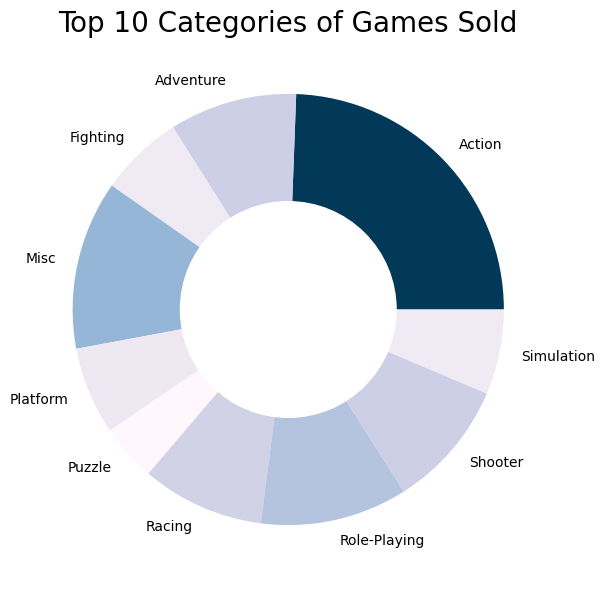

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


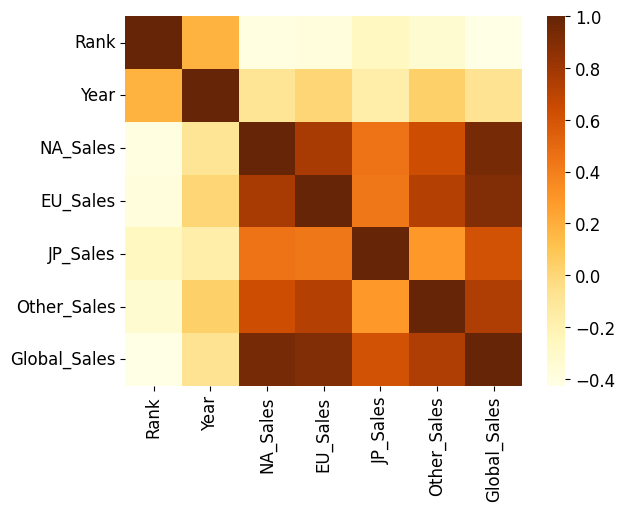

Decision Tree MSE: 0.679567566738263
Decision Tree R^2: 0.8411471038601219
Linear Regression MSE: 2.8539540789498857e-05
Linear Regression R^2: 0.9999933287153024


['final_linear_regression_model.pkl']

In [ ]:
# Importing the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Read the dataset using pandas library
data = pd.read_csv('vgsales.csv')

# Displaying the first and last few rows of the dataset
print(data.head())
print(data.tail())
print(data.shape)
print(data.info())

# Dropping the Null Values
print(data.isna().sum())
data = data.dropna()
print(data.head(10))
print(data.isna().sum())

# Visualizations
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]

plt.figure(figsize=(7, 7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

# Correlation heatmap
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
print(numeric_data.corr())
sns.heatmap(numeric_data.corr(), cmap="YlOrBr")
plt.show()

# Converting dependent and independent variables
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(xtrain, ytrain)

# Test Decision Tree model
dt_predictions = dt_model.predict(xtest)
dt_mse = mean_squared_error(ytest, dt_predictions)
dt_r2 = r2_score(ytest, dt_predictions)

print("Decision Tree MSE:", dt_mse)
print("Decision Tree R^2:", dt_r2)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)

# Test Linear Regression model
lr_predictions = lr_model.predict(xtest)
lr_mse = mean_squared_error(ytest, lr_predictions)
lr_r2 = r2_score(ytest, lr_predictions)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression R^2:", lr_r2)

# Finalizing and saving the models
joblib.dump(dt_model, 'final_decision_tree_model.pkl')
joblib.dump(lr_model, 'final_linear_regression_model.pkl')
